In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
plt.style.use(['classic'])

In [2]:
# Read in Revenue Files
file_2008 = "../../datasets/subsets/inst_ex/inst_ex_2008.csv"

inst_2008 = pd.read_csv(file_2008)
inst_2008 = inst_2008.set_index(['STNAME'])
inst_2008

,2008_E11,2008_E12,2008_E13,2008_E14,2008_E15,2008_E16,2008_E17,2008_E18,2008_E11A,2008_E11B,2008_E11C,2008_E11D,2008_E2
STNAME,,,,,,,,,,,,,
alabama,2553753211,1013988946,103804295,2587035.0,4.911040e+05,319782186,10007220,14818812,1.804977e+09,3.047413e+08,113324891.0,32245284.0,64679609.0
alaska,578916138,412554779,58220404,253685.0,4.961400e+04,57778645,14333715,9716959,NaN,NaN,NaN,NaN,NaN
arizona,3392319069,795319935,232646658,5584751.0,1.706217e+07,186256068,161983165,139412910,2.255071e+09,3.416878e+08,78404671.0,111499629.0,122338095.0
arkansas,1689264640,442210880,76450288,10372135.0,1.073674e+07,190879748,20877187,17125541,1.108673e+09,1.770157e+08,84765135.0,140803469.0,43070866.0
california,24408875167,7890652494,1685441818,768743270.0,3.992673e+08,2190205445,47412903,3586386,1.800636e+10,2.794442e+09,152299754.0,854189829.0,608426383.0
colorado,2815247254,933354668,103557233,53048418.0,8.330034e+06,281898270,55644576,62285149,2.048331e+09,3.341751e+08,78776335.0,92050280.0,65980264.0
connecticut,3343802807,1263905104,157190087,333705043.0,5.471884e+07,122526472,36632745,7503496,2.160411e+09,3.593438e+08,39580526.0,116516195.0,NaN
delaware,578066875,257760317,12841780,5895517.0,6.377714e+07,33087199,2705253,9164913,3.601349e+08,1.140653e+08,17116980.0,23147455.0,8027432.0
district of columbia,420355775,63321432,68566969,34540141.0,NaN,92048679,20986729,9372281,1.941080e+08,4.932108e+07,7851090.0,14285027.0,2525270.0


In [4]:
(inst_2008.sum(axis=1)/1000000000).sort_values(ascending = False).head(5)

STNAME
california      59.809905
new york        32.599159
texas           23.509835
pennsylvania    23.413092
florida         23.028101
dtype: float64

In [5]:
summary_2008 = pd.DataFrame(inst_2008.sum(axis=1)/100000000, columns=['Total InstructionalEx ($100M)'])
summary_2008['InstructionalEx ($100M)'] = inst_2008.iloc[:,0:8].sum(axis=1)/100000000
summary_2008['Teacher Salaries ($100M)'] = inst_2008.iloc[:,8:13].sum(axis=1)/100000000
summary_2008

,Total InstructionalEx ($100M),InstructionalEx ($100M),Teacher Salaries ($100M)
STNAME,,,
alabama,63.392011,40.192328,23.199682
alaska,11.318239,11.318239,0.000000
arizona,78.395863,49.305847,29.090015
arkansas,40.122451,24.579172,15.543279
california,598.099052,373.941848,224.157204
colorado,69.326783,43.133656,26.193127
connecticut,79.958360,53.199846,26.758514
delaware,14.857910,9.632990,5.224920
district of columbia,9.772825,7.091920,2.680905


In [7]:
summary_pct = pd.DataFrame(summary_2008['InstructionalEx ($100M)'] / summary_2008['Total InstructionalEx ($100M)'] *100, columns = ['Instructional (%)'])
summary_pct['Teacher Salaries (%)'] = summary_2008['Teacher Salaries ($100M)'] / summary_2008['Total InstructionalEx ($100M)'] *100
summary_pct

,Instructional (%),Teacher Salaries (%)
STNAME,,
alabama,63.402829,36.597171
alaska,100.000000,0.000000
arizona,62.893430,37.106570
arkansas,61.260394,38.739606
california,62.521726,37.478274
colorado,62.217882,37.782118
connecticut,66.534438,33.465562
delaware,64.834084,35.165916
district of columbia,72.567757,27.432243


In [8]:
# Load in Dropout Rates
dropout_path = "../../datasets/subsets/success/success_df_2008.csv"

success_2008 = pd.read_csv(dropout_path)
success_2008

,STNAME,2008_DRP912,2008_DRP9,2008_DRP10,2008_DRP11,2008_DRP12,2008_DRPAM,2008_DRPAS,2008_DRPHI,2008_DRPBL,2008_DRPWH
0,alabama,2.199999,1.900000,2.400000,2.500000,1.799999,1.799999,1.099999,2.199999,2.199999,2.099998
1,alaska,7.299999,4.299999,5.799999,9.000000,10.399994,12.199997,6.899998,7.500000,9.599998,5.099998
2,arizona,6.699997,4.199997,5.099998,6.799999,10.799995,11.399994,3.799999,7.299999,7.099998,5.599998
3,arkansas,4.699997,2.799999,4.199997,5.699997,6.299999,4.899998,2.799999,5.099998,6.699997,4.000000
4,california,5.000000,2.500000,3.000000,4.099998,11.000000,6.599998,2.299999,6.000000,9.000000,3.099998
5,colorado,6.399998,3.900000,4.799999,7.199997,10.199997,11.299995,3.799999,12.099998,10.599998,3.900000
6,connecticut,2.799999,2.599998,2.900000,3.099998,2.699999,2.500000,1.500000,6.099998,5.599998,1.599999
7,delaware,6.000000,6.299999,6.399998,5.199997,6.199997,9.399994,NaN,8.199997,7.699997,4.899998
8,district of columbia,5.500000,5.699997,5.899998,5.199997,4.699997,NaN,NaN,NaN,NaN,NaN
9,florida,3.299999,2.799999,3.000000,3.099998,3.599998,2.500000,1.099999,3.699999,4.699997,2.099998


In [10]:
summary_pct['Dropout Rate'] = ''

for i in range(len(success_2008)):
    summary_pct['Dropout Rate'][i] = success_2008['2008_DRP912'][i].astype(float)
    
summary_pct

C:\Users\pcmur\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Instructional (%),Teacher Salaries (%),Dropout Rate
STNAME,,,
alabama,63.402829,36.597171,2.2
alaska,100.000000,0.000000,7.3
arizona,62.893430,37.106570,6.7
arkansas,61.260394,38.739606,4.7
california,62.521726,37.478274,5
colorado,62.217882,37.782118,6.4
connecticut,66.534438,33.465562,2.8
delaware,64.834084,35.165916,6
district of columbia,72.567757,27.432243,5.5


In [11]:
summary_pct.sort_values(by=['Dropout Rate'], ascending = False)

,Instructional (%),Teacher Salaries (%),Dropout Rate
STNAME,,,
louisiana,62.428962,37.571038,7.5
alaska,100.000000,0.000000,7.3
arizona,62.893430,37.106570,6.7
colorado,62.217882,37.782118,6.4
michigan,64.250216,35.749784,6.2
delaware,64.834084,35.165916,6
washington,62.865417,37.134583,5.7
district of columbia,72.567757,27.432243,5.5
hawaii,65.559473,34.440527,5.4


In [12]:
summary_2008['Dropout Rate'] = ''

for i in range(len(success_2008)):
    summary_2008['Dropout Rate'][i] = success_2008['2008_DRP912'][i].astype(float)
    

summary_2008 = summary_2008[summary_2008['Dropout Rate'].notna()]
summary_2008['Dropout Rate'] = summary_2008['Dropout Rate'].astype(float)
summary_2008.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, alabama to wyoming
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Total InstructionalEx ($100M)  50 non-null     float64
 1   InstructionalEx ($100M)        50 non-null     float64
 2   Teacher Salaries ($100M)       50 non-null     float64
 3   Dropout Rate                   50 non-null     float64
dtypes: float64(4)
memory usage: 2.0+ KB


C:\Users\pcmur\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\pcmur\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
summary_pct['Dropout Rate'] = ''

for i in range(len(success_2008)):
    summary_pct['Dropout Rate'][i] = success_2008['2008_DRP912'][i].astype(float)
    

summary_pct = summary_pct[summary_pct['Dropout Rate'].notna()]
summary_pct['Dropout Rate'] = summary_pct['Dropout Rate'].astype(float)
summary_pct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, alabama to wyoming
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Instructional (%)     50 non-null     float64
 1   Teacher Salaries (%)  50 non-null     float64
 2   Dropout Rate          50 non-null     float64
dtypes: float64(3)
memory usage: 1.6+ KB


C:\Users\pcmur\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\pcmur\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


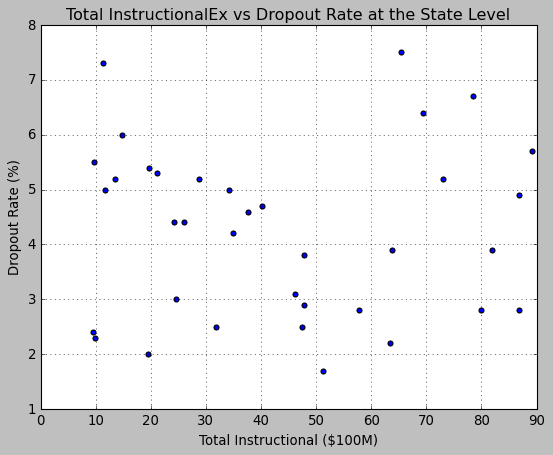

In [14]:
# Total Revenue and Dropout Rate
plt.scatter(summary_2008['Total InstructionalEx ($100M)'], summary_2008['Dropout Rate'])
plt.xlabel('Total Instructional ($100M)')
plt.xlim(left = 0, right = 90)
plt.ylabel('Dropout Rate (%)')
plt.title("Total InstructionalEx vs Dropout Rate at the State Level")
plt.grid()

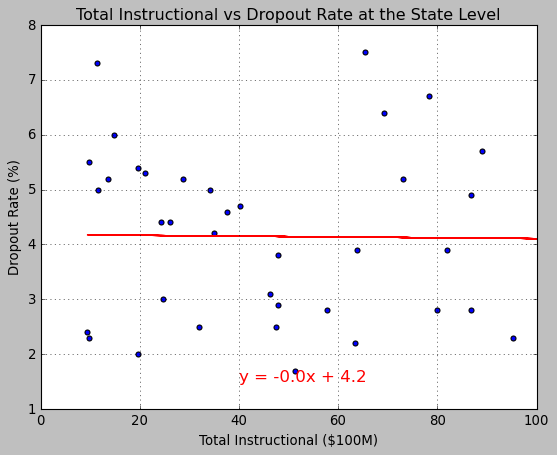

The correlation between both factors is -0.0513


In [15]:
# Total Instructional vs Dropout Rate
x_values = summary_2008['Total InstructionalEx ($100M)']
y_values = summary_2008['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Total Instructional ($100M)')
plt.ylabel('Dropout Rate (%)')
plt.title('Total Instructional vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 100)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

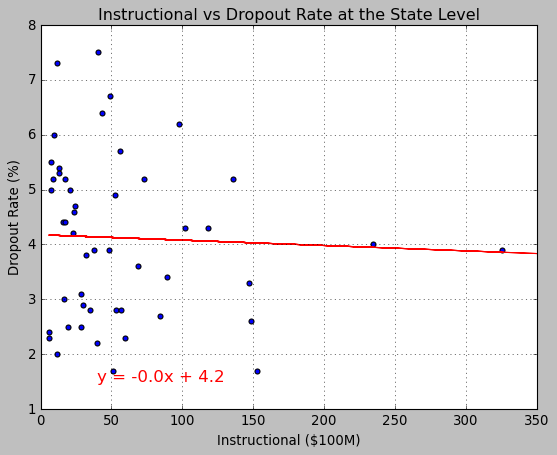

The correlation between both factors is -0.0503


In [16]:
# Total Instructional vs Dropout Rate
x_values = summary_2008['InstructionalEx ($100M)']
y_values = summary_2008['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Instructional ($100M)')
plt.ylabel('Dropout Rate (%)')
plt.title('Instructional vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 350)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

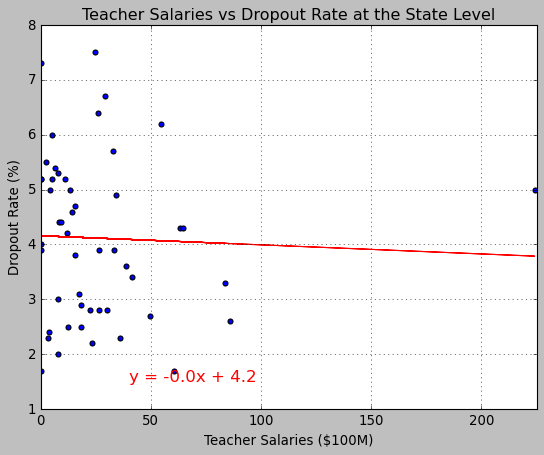

The correlation between both factors is -0.0401


In [18]:
# Teacher Salaries vs Dropout Rate
x_values = summary_2008['Teacher Salaries ($100M)']
y_values = summary_2008['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Teacher Salaries ($100M)')
plt.ylabel('Dropout Rate (%)')
plt.title('Teacher Salaries vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 225)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

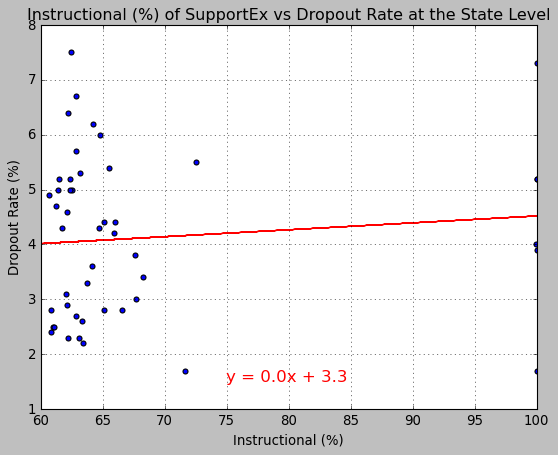

The correlation between both factors is 0.1049


In [19]:
# Instructional (%) vs Dropout Rate
x_values = summary_pct['Instructional (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(75,1.5),fontsize=15,color="red")
plt.xlabel('Instructional (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Instructional (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 60, right = 100)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

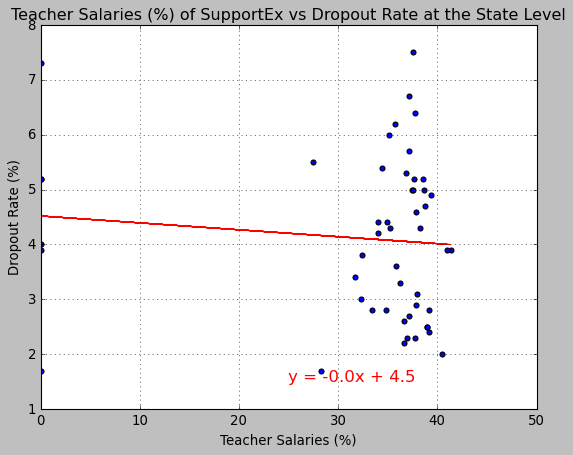

The correlation between both factors is -0.1049


In [20]:
# Teacher Salaries (%) vs Dropout Rate
x_values = summary_pct['Teacher Salaries (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,1.5),fontsize=15,color="red")
plt.xlabel('Teacher Salaries (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Teacher Salaries (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 50)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")